In [0]:
import os
os.environ['KAGGLE_USERNAME'] = 'hodaibrahim'
os.environ['KAGGLE_KEY'] = '22b10fa7b1865f7e7779cb5d58b02d9a'
!kaggle datasets download -d allen-institute-for-ai/CORD-19-research-challenge # api copied from kaggle

100% 2.74G/2.75G [00:27<00:00, 204MB/s]
100% 2.75G/2.75G [00:27<00:00, 108MB/s]


In [0]:
os.listdir()
!unzip 'CORD-19-research-challenge.zip'

Streaming output truncated to the last 5000 lines.
  inflating: document_parses/pmc_json/PMC7176212.xml.json  
  inflating: document_parses/pmc_json/PMC7176213.xml.json  
  inflating: document_parses/pmc_json/PMC7176214.xml.json  
  inflating: document_parses/pmc_json/PMC7176215.xml.json  
  inflating: document_parses/pmc_json/PMC7176216.xml.json  
  inflating: document_parses/pmc_json/PMC7176217.xml.json  
  inflating: document_parses/pmc_json/PMC7176218.xml.json  
  inflating: document_parses/pmc_json/PMC7176219.xml.json  
  inflating: document_parses/pmc_json/PMC7176220.xml.json  
  inflating: document_parses/pmc_json/PMC7176221.xml.json  
  inflating: document_parses/pmc_json/PMC7176222.xml.json  
  inflating: document_parses/pmc_json/PMC7176223.xml.json  
  inflating: document_parses/pmc_json/PMC7176224.xml.json  
  inflating: document_parses/pmc_json/PMC7176225.xml.json  
  inflating: document_parses/pmc_json/PMC7176226.xml.json  
  inflating: document_parses/pmc_json/PMC7176227.

In [0]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import requests
from bs4 import BeautifulSoup
import glob
import json
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import defaultdict
ranking = defaultdict(int)
from heapq import nlargest
from nltk.probability import FreqDist
from nltk.corpus import stopwords
# from langdetect import detect  #detects what language is written
from nltk.collocations import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
import nltk


import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
!pip install word2number

In [0]:
import word2number
import spacy
from word2number import w2n
import en_core_web_sm
nlp = en_core_web_sm.load()

In [0]:
# Import data
#pd.set_option('max_colwidth',50)
metadata_path ='metadata.csv'
meta_df_org= pd.read_csv(metadata_path)
meta_df = meta_df_org.copy()
len(meta_df)

128492

In [0]:
meta_df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636.0,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967.0,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972.0,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871.0,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888.0,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [0]:
all_json = glob.glob(f'**/*.json', recursive=True)
len(all_json)

103315

In [0]:
all_data = []
# Reading the json as a dict
for file_path in all_json:
  with open(file_path) as json_data:
      data = json.load(json_data)
  try:
    try:
      abstract = ' '.join([text['text'] for text in data['abstract']])
    except:
      abstract = 'Not Provided'
      
    all_data.append([data['paper_id'], data['metadata']['title'],
      abstract,
      ' '.join([text['text'] for text in data['body_text']]) ])
    print(file_path)
  except Exception as e:
    print('Error in: ' + file_path + ' getting ' +str(e))
    continue

len(all_data)

Streaming output truncated to the last 5000 lines.
document_parses/pmc_json/PMC6213290.xml.json
document_parses/pmc_json/PMC3447679.xml.json
document_parses/pmc_json/PMC7151801.xml.json
document_parses/pmc_json/PMC7088169.xml.json
document_parses/pmc_json/PMC7110054.xml.json
document_parses/pmc_json/PMC7090922.xml.json
document_parses/pmc_json/PMC7126797.xml.json
document_parses/pmc_json/PMC7180379.xml.json
document_parses/pmc_json/PMC7149627.xml.json
document_parses/pmc_json/PMC7080029.xml.json
document_parses/pmc_json/PMC3310645.xml.json
document_parses/pmc_json/PMC4144724.xml.json
document_parses/pmc_json/PMC7216127.xml.json
document_parses/pmc_json/PMC7098028.xml.json
document_parses/pmc_json/PMC7107168.xml.json
document_parses/pmc_json/PMC3308941.xml.json
document_parses/pmc_json/PMC7094654.xml.json
document_parses/pmc_json/PMC7172156.xml.json
document_parses/pmc_json/PMC7091296.xml.json
document_parses/pmc_json/PMC7130834.xml.json
document_parses/pmc_json/PMC7091360.xml.json
docu

103314

In [0]:
df = pd.DataFrame(all_data, columns=["paper_id", "title", "abstract", "body_text"])

In [0]:
df.to_csv(r'json_df.csv', index = False)

In [0]:
# Import data
#pd.set_option('max_colwidth',50)
json_path ='json_df.csv'
json_df_org= pd.read_csv(json_path)
json_df = json_df_org.copy()
len(json_df)

103314

In [0]:
# json_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [0]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [0]:
draw_missing_data_table(json_df)

In [0]:
json_df.rename(columns={"paper_id": "sha"}, inplace=True)

In [0]:
json_df.head()

,sha,title,abstract,body_text
0,0bb181551513e8bfdac02b7936920ac3f50d01c1,Parallel evolution of influenza across multipl...,Viral variants that arise in the global influe...,Viruses rapidly acquire de novo mutations as t...
1,bea5c5ac28bc4818ebb5f2704c3335b5dbf5f54b,NaN,NaN,official sector often does not learn about the...
2,677e721c74f2f5903acfc1373e01f889945e05ec,Outbreak of Necrotizing Enterocolitis Caused b...,Objectives To investigate an outbreak of necro...,The NICU was a 21-bed unit requiring special a...
3,9acf04a61983194eff5f3384397f84e0c74c5c32,Design and Simulation of Isolation Room for a ...,"Heating, ventilation and air conditioning (HVA...",The later stage of twentieth century witnessed...
4,eff8bed68ef6109e8f0c51a8b1ec4b6ca5b6329e,Nanopore sequencing as a revolutionary diagnos...,Enteric diseases in swine are often caused by ...,metagenomics is a valuable asset for diagnosti...


In [0]:
mergedStuff = pd.merge(json_df, meta_df, on=['sha'], how='inner') #merged data by same sha
len(mergedStuff)

52474

In [0]:
len(mergedStuff[mergedStuff['body_text'].isna()])

In [0]:
mergedStuff.head()

In [0]:
mergedStuff[['abstract_x','abstract_y']].head()

In [0]:
mergedStuff[['abstract_x','abstract_y']].head().style.set_properties(**{'text-align': "justify"})

In [0]:
mergedStuff['word_count_json'] = mergedStuff['abstract_x'].apply(lambda x: len(str(x).split(" ")))
mergedStuff['word_count_meta'] = mergedStuff['abstract_y'].apply(lambda x: len(str(x).split(" ")))

In [0]:
mergedStuff[['word_count_json','word_count_meta']].head(15)

,word_count_json,word_count_meta
0,150,152
1,1,1
2,217,215
3,141,141
4,343,198
5,255,255
6,412,382
7,87,87
8,105,105
9,208,208


In [0]:
mergedStuff.loc[7]['abstract_y']

'Novel coronavirus has become a global health hazard and its high infectivity is alarming. The imaging findings of the 2019-nCoV infection in our young diabetic patient featured ground-glass opacities and consolidations in both lungs. The lung lesions may involute rapidly during the course. The patient showed improvement both clinically and on computed tomography imaging at discharged after 2 weeks’ treatment. Computed tomography scans of patients helped monitor the changes continuously, which could timely provide the information of the evolution of the disease or therapeutic effect to clinicians.'

In [0]:
mergedStuff.loc[7]['abstract_x']

"Novel coronavirus has become a global health hazard and its high infectivity is alarming. The imaging findings of the 2019-nCoV infection in our young diabetic patient featured ground-glass opacities and consolidations in both lungs. The lung lesions may involute rapidly during the course. The patient showed improvement both clinically and on computed tomography imaging at discharged after 2 weeks' treatment. Computed tomography scans of patients helped monitor the changes continuously, which could timely provide the information of the evolution of the disease or therapeutic effect to clinicians."

In [0]:
def get_longer_text(clomn_x, column_y):
    return clomn_x if len(str(clomn_x).strip().split(" ")) > len(str(column_y).strip().split(" ")) else column_y
    
mergedStuff['abstract'] = mergedStuff.apply(lambda row: get_longer_text(row['abstract_x'], row['abstract_y']), axis = 1)

In [0]:
mergedStuff['word_count_abstract'] = mergedStuff['abstract'].apply(lambda x: len(str(x).split(" ")))

In [0]:
mergedStuff['word_count_abstract'].head(15)

0     152
1       1
2     217
3     141
4     343
5     255
6     412
7      87
8     105
9     208
10    224
11    184
12    158
13      1
14    297
Name: word_count_abstract, dtype: int64

In [0]:
mergedStuff.drop(['abstract_x','abstract_y', 'word_count_json', 'word_count_meta'], axis=1, inplace=True)

In [0]:
mergedStuff['title_count_json'] = mergedStuff['title_x'].apply(lambda x: len(str(x).split(" ")))
mergedStuff['title_count_meta'] = mergedStuff['title_y'].apply(lambda x: len(str(x).split(" ")))

In [0]:
mergedStuff[['title_count_json','title_count_meta']].head(15)

,title_count_json,title_count_meta
0,8,8
1,1,22
2,13,13
3,9,9
4,22,21
5,13,13
6,12,12
7,14,14
8,9,15
9,13,11


In [0]:

mergedStuff['title'] = mergedStuff.apply(lambda row: get_longer_text(row['title_x'], row['title_y']), axis = 1)

In [0]:
mergedStuff['word_count_title'] = mergedStuff['title'].apply(lambda x: len(str(x).split(" ")))

In [0]:
mergedStuff.drop(['title_x','title_y', 'title_count_json', 'title_count_meta'], axis=1, inplace=True)

In [0]:
mergedStuff['word_count_title'].head(15)

In [0]:
# mergedStuff.drop(['Microsoft Academic Paper ID','WHO #Covidence'], axis=1, inplace=True)

In [0]:
mergedStuff = mergedStuff[['sha', 'body_text', 'abstract', 'word_count_abstract' ,'title', 'word_count_title', 'url','source_x','doi','license','publish_time','authors','journal']]

In [0]:
mergedStuff.head(5)

,sha,body_text,abstract,word_count_abstract,title,word_count_title,url,source_x,doi,license,publish_time,authors,journal
0,0bb181551513e8bfdac02b7936920ac3f50d01c1,Viruses rapidly acquire de novo mutations as t...,Viral variants that arise in the global influe...,152,Parallel evolution of influenza across multipl...,8,NaN,Medline; PMC,10.7554/elife.26875,cc-by,2017-06-27,"Xue, Katherine S; Stevens-Ayers, Terry; Campbe...",eLife
1,bea5c5ac28bc4818ebb5f2704c3335b5dbf5f54b,official sector often does not learn about the...,NaN,1,Risk Communication and the Community Response ...,22,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,PMC,10.1007/978-1-4020-5808-0_14,no-cc,2007,"Pollack, Marjorie",Risk Assessment and Risk Communication Strateg...
2,677e721c74f2f5903acfc1373e01f889945e05ec,The NICU was a 21-bed unit requiring special a...,Objectives To investigate an outbreak of necro...,217,Outbreak of Necrotizing Enterocolitis Caused b...,13,https://api.elsevier.com/content/article/pii/S...,Elsevier; Medline; PMC,10.1016/j.jpeds.2008.04.015,els-covid,2008-09-30,"Turcios-Ruiz, Reina M.; Axelrod, Peter; St. Jo...",The Journal of Pediatrics
3,9acf04a61983194eff5f3384397f84e0c74c5c32,The later stage of twentieth century witnessed...,"Heating, ventilation and air conditioning (HVA...",141,Design and Simulation of Isolation Room for a ...,9,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,PMC,10.1007/978-981-13-6416-7_8,no-cc,2019-04-24,"Jacob, Simeon; Yadav, Siddharth Singh; Sikarwa...",Advances in Fluid and Thermal Engineering
4,eff8bed68ef6109e8f0c51a8b1ec4b6ca5b6329e,metagenomics is a valuable asset for diagnosti...,Enteric diseases in swine are often caused by ...,343,Nanopore sequencing as a revolutionary diagnos...,22,NaN,Medline; PMC,10.1038/s41598-018-28180-9,cc-by,2018-06-29,"Theuns, Sebastiaan; Vanmechelen, Bert; Bernaer...",Sci Rep


In [0]:
dp = mergedStuff[mergedStuff.duplicated(['body_text'])] #len of duplicated sha in mergedStuff
len(dp)

140

In [0]:
mergedStuff[mergedStuff['body_text'].str.contains("The COVID-19 pandemic has resulted in a proliferation of clinical trials that are designed to slow the spread of severe acute respiratory")]['abstract']

26664    Abstract The COVID-19 pandemic has resulted in...
52318    Abstract The COVID-19 pandemic has resulted in...
Name: abstract, dtype: object

In [0]:
mergedStuff.drop_duplicates(subset =["body_text"], inplace = True,keep='first') 

In [0]:
len(mergedStuff)

52334

In [0]:
nonMergedSJsontuff = json_df[(~json_df.sha.isin(mergedStuff.sha))]  #data with diff sha in json file (non merged)
len(nonMergedSJsontuff)

50980

In [0]:
dpj = nonMergedSJsontuff[nonMergedSJsontuff.duplicated(['body_text'])] #len of duplicated sha in mergedStuff
len(dpj)

1365

In [0]:
nonMergedSJsontuff.drop_duplicates(subset =["body_text"], inplace = True,keep='first') 

In [0]:
len(nonMergedSJsontuff)

49615

In [0]:
nonMergedSJsontuff["body_text"] = nonMergedSJsontuff["body_text"].str.lower()

In [0]:
nonMergedSJsontuff = nonMergedSJsontuff[nonMergedSJsontuff["body_text"].str.contains("covid|cov-2|cov2|ncov", na=False)]

In [0]:
len(nonMergedSJsontuff)

9980

In [0]:
# 38178+46366

In [0]:
mergedStuff = pd.concat([mergedStuff,nonMergedSJsontuff], axis=0, ignore_index=True)

In [0]:
len(mergedStuff)

62314

In [0]:
dpj = mergedStuff[mergedStuff.duplicated(['body_text'])] #len of duplicated sha in mergedStuff
len(dpj)

0

In [0]:
nonMergedMetaStuff = meta_df[(~meta_df.sha.isin(mergedStuff.sha))]  #data with diff sha in detadata file(non merged)
len(nonMergedMetaStuff)

76141

In [0]:
dpm = nonMergedMetaStuff[nonMergedMetaStuff.duplicated(['abstract'])] #len of duplicated sha in mergedStuff
len(dpm)

22224

In [0]:
mergedStuff = pd.concat([mergedStuff,nonMergedMetaStuff], axis=0, ignore_index=True)

In [0]:
len(mergedStuff)

138455

In [0]:
draw_missing_data_table(nonMergedMetaStuff)

In [0]:
mergedStuff['bt_count'] = mergedStuff['body_text'].apply(lambda x: len(str(x).split(" ")))

In [0]:
# del mergedStuff['bt_count_json']

In [0]:
mergedStuff.head()

,sha,body_text,abstract,word_count_abstract,title,word_count_title,url,source_x,doi,license,publish_time,authors,journal,cord_uid,pmcid,pubmed_id,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,s2_id,bt_count
0,0bb181551513e8bfdac02b7936920ac3f50d01c1,Viruses rapidly acquire de novo mutations as t...,Viral variants that arise in the global influe...,152.0,Parallel evolution of influenza across multipl...,8.0,NaN,Medline; PMC,10.7554/elife.26875,cc-by,2017-06-27,"Xue, Katherine S; Stevens-Ayers, Terry; Campbe...",eLife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5117
1,bea5c5ac28bc4818ebb5f2704c3335b5dbf5f54b,official sector often does not learn about the...,NaN,1.0,Risk Communication and the Community Response ...,22.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,PMC,10.1007/978-1-4020-5808-0_14,no-cc,2007,"Pollack, Marjorie",Risk Assessment and Risk Communication Strateg...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2567
2,677e721c74f2f5903acfc1373e01f889945e05ec,The NICU was a 21-bed unit requiring special a...,Objectives To investigate an outbreak of necro...,217.0,Outbreak of Necrotizing Enterocolitis Caused b...,13.0,https://api.elsevier.com/content/article/pii/S...,Elsevier; Medline; PMC,10.1016/j.jpeds.2008.04.015,els-covid,2008-09-30,"Turcios-Ruiz, Reina M.; Axelrod, Peter; St. Jo...",The Journal of Pediatrics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2384
3,9acf04a61983194eff5f3384397f84e0c74c5c32,The later stage of twentieth century witnessed...,"Heating, ventilation and air conditioning (HVA...",141.0,Design and Simulation of Isolation Room for a ...,9.0,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,PMC,10.1007/978-981-13-6416-7_8,no-cc,2019-04-24,"Jacob, Simeon; Yadav, Siddharth Singh; Sikarwa...",Advances in Fluid and Thermal Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4309
4,eff8bed68ef6109e8f0c51a8b1ec4b6ca5b6329e,metagenomics is a valuable asset for diagnosti...,Enteric diseases in swine are often caused by ...,343.0,Nanopore sequencing as a revolutionary diagnos...,22.0,NaN,Medline; PMC,10.1038/s41598-018-28180-9,cc-by,2018-06-29,"Theuns, Sebastiaan; Vanmechelen, Bert; Bernaer...",Sci Rep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6987


In [0]:
mergedStuff['Year'] = pd.to_datetime(mergedStuff['publish_time']).dt.year

In [0]:
mergedStuff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138455 entries, 0 to 138454
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sha                  65714 non-null   object 
 1   body_text            62314 non-null   object 
 2   abstract             112291 non-null  object 
 3   word_count_abstract  52334 non-null   float64
 4   title                138191 non-null  object 
 5   word_count_title     52334 non-null   float64
 6   url                  49156 non-null   object 
 7   source_x             128475 non-null  object 
 8   doi                  100572 non-null  object 
 9   license              128475 non-null  object 
 10  publish_time         128460 non-null  object 
 11  authors              123709 non-null  object 
 12  journal              122181 non-null  object 
 13  cord_uid             76141 non-null   object 
 14  pmcid                13159 non-null   object 
 15  pubmed_id        

In [0]:
mergedStuff = mergedStuff[mergedStuff['Year'] == 2020]

In [0]:
len(mergedStuff)

35476

In [0]:
len(choosen[choosen['body_text'].notna()])

13761

In [0]:
text = list(choosen['body_text'])

In [0]:
len(text)

13741

In [0]:
!pip install msgpack==0.5.6 spacy==2.0.13 https://github.com/huggingface/neuralcoref-models/releases/download/en_coref_md-3.0.0/en_coref_md-3.0.0.tar.gz


     |████████████████████████████████| 161.3MB 79kB/s 
  Using cached https://files.pythonhosted.org/packages/e6/08/c67d0dee1aa7e5cbcd35835ce666e47a482d47bd0af0a9c24acc654b8a2d/spacy-2.0.13-cp36-cp36m-manylinux1_x86_64.whl
  Created wheel for en-coref-md: filename=en_coref_md-3.0.0-cp36-cp36m-linux_x86_64.whl size=163510670 sha256=5c1cb091e5cd90e20bbef77629996b0e9f8865d65cbc789c0171779c358ba3c4
  Stored in directory: /root/.cache/pip/wheels/aa/a3/8f/9df13c027b75169bcca62682563e9823bb213c72a2cc3efed8
Successfully built en-coref-md
ERROR: fastai 1.0.61 has requirement spacy>=2.0.18; python_version < "3.8", but you'll have spacy 2.0.13 which is incompatible.
ERROR: en-core-web-sm 2.2.5 has requirement spacy>=2.2.2, but you'll have spacy 2.0.13 which is incompatible.


In [0]:
doc = nlp("After making the iOS update you won't notice a radical system-wide redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of iOS 11's furniture remains the same as in iOS 10. But you will discover some tweaks once you delve a little deeper.")

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{'TEXT': 'iOS'}, {'IS_DIGIT': True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('IOS_VERSION_PATTERN', None, pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

NameError: ignored

In [0]:
# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
# This is the faster version of: [nlp(country) for country in COUNTRIES]
# patterns = list(nlp.pipe(COUNTRIES))
# matcher.add('COUNTRY', None, *patterns)
def func(test):
  # transmission, incubation, and environmental stability
  doc = nlp(test)
  # Call the matcher on the test document and print the result
  pattern1 = [{'LEMMA': 'transitive'}]
  pattern2 = [{'LEMMA': 'transmincubationission'}]
  pattern3 = [{'LEMMA': 'environmental'},{'LEMMA': 'stability'}]

   # Add the pattern to the matcher and apply the matcher to the doc
  matcher.add('pattern1', None, pattern1)
  matches = matcher(doc)
  print('Total matches found:', len(matches))

  # Iterate over the matches and print the span text
  for match_id, start, end in matches:
      print('Match found:', doc[start:end].text)



for test in text:
  func(test)


TypeError: ignored

In [0]:
mergedStuff['']

In [0]:
mergedStuff['bt_count_word'] = mergedStuff['body_text'].apply(lambda x: len(str(x).split(" ")))


In [0]:
choosen = mergedStuff[mergedStuff['bt_count_word'] > 30]

In [0]:
len(choosen)

13741

In [0]:
choosen.loc[choosen['body_text'].notna()].describe()

,word_count_abstract,word_count_title,pubmed_id,mag_id,s2_id,bt_count,Year,bt_count_word
count,13741.000000,13741.000000,0.0,0.0,0.0,13741.000000,13741.0,13741.000000
mean,175.537588,15.701841,NaN,NaN,NaN,2660.484026,2020.0,2660.484026
std,191.277707,9.556838,NaN,NaN,NaN,2761.216361,0.0,2761.216361
min,1.000000,1.000000,NaN,NaN,NaN,31.000000,2020.0,31.000000
25%,38.000000,10.000000,NaN,NaN,NaN,979.000000,2020.0,979.000000
50%,163.000000,14.000000,NaN,NaN,NaN,2050.000000,2020.0,2050.000000
75%,250.000000,19.000000,NaN,NaN,NaN,3549.000000,2020.0,3549.000000
max,6326.000000,241.000000,NaN,NaN,NaN,91469.000000,2020.0,91469.000000


In [0]:
mergedStuff['body_text'].head()

7     Since December 2019, cases of unexplained pneu...
16    IDentif.AI showed hydroxychloroquine and azith...
18    LNo!new!ART!enrolments! LNo!new!VMMC! L(No!PrE...
20    conduct and participate in sporting events. Co...
29    In 2015 and 2016, large outbreaks of Zika viru...
Name: body_text, dtype: object

In [0]:
!pip install nltk

In [0]:
abs_by_bt = mergedStuff.loc[(mergedStuff['abstract'].isna())]
len(abs_by_bt)

4197

In [0]:
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def summarize(index, text, n):
    sents = sent_tokenize(text)
    print(index)
    if len(sents) < 6:
        n = len(sents)
    
    assert n <= len(sents)
    word_sent = word_tokenize(text.lower())
    _stopwords = set(stopwords.words('english') + list(punctuation))
    _stopwords.update(['.', ',', 'the', 'another', 'is', 'dear', 'also', 'may', 'of', 'a', 'are', 'From'])
    
    word_sent=[word for word in word_sent if word not in _stopwords]
    freq = FreqDist(word_sent)
    
    
    ranking = defaultdict(int)
    
    for i,sent in enumerate(sents):
        for w in word_tokenize(sent.lower()):
            if w in freq:
                ranking[i] += freq[w]
             
        
    sents_idx = nlargest(n, ranking, key=ranking.get)
    abstract = ' '.join([sents[j] for j in sorted(sents_idx)])
    mergedStuff.at[index, 'abstract'] = abstract
    return

In [0]:
res = abs_by_bt.apply(lambda row: summarize(row.name, str(row['body_text']), 6) ,axis=1)

0
24
34
42
61
70
111
146
157
207
226
263
268
271
279
309
316
327
334
344
348
399
410
420
429
444
447
449
468
491
519
533
534
538
550
589
606
613
621
624
641
644
647
661
674
685
691
693
740
760
761
809
811
847
862
866
867
890
895
919
951
970
1013
1015
1017
1023
1045
1069
1095
1127
1136
1160
1166
1167
1173
1187
1189
1213
1222
1226
1236
1334
1357
1366
1385
1392
1393
1395
1403
1413
1425
1439
1465
1467
1482
1489
1538
1706
1733
1734
1738
1750
1754
1759
1760
1837
1864
1867
1875
1891
1898
1926
1932
1947
1958
2018
2019
2021
2024
2048
2053
2083
2103
2104
2107
2112
2119
2132
2140
2147
2167
2170
2180
2256
2303
2328
2332
2341
2345
2357
2359
2376
2405
2452
2453
2487
2491
2496
2500
2504
2537
2557
2563
2576
2578
2586
2613
2618
2672
2681
2685
2688
2708
2715
2772
2775
2816
2821
2838
2856
2875
2908
2928
2954
2959
2960
2965
2970
2984
3071
3083
3093
3107
3127
3149
3151
3152
3154
3175
3176
3188
3197
3204
3206
3217
3218
3227
3233
3248
3249
3270
3286
3324
3357
3386
3399
3402
3421
3422
3431
3453
3467
3477
3505

In [0]:
mergedStuff.to_csv(r'merged_stuff_after_summarizing.csv', index = False)

In [0]:
mergedStuff_path ='merged_stuff_after_summarizing.csv'
mergedStuff_org = pd.read_csv(mergedStuff_path)
mergedStuff = mergedStuff_org.copy()

In [0]:
mergedStuff['body_text'].head()

0    incluaient des patients hospitalisés pour pneu...
1    On 8 February 2020 an alarming report in the C...
2    In the current SARS-CoV-2 pandemic (COVID-19),...
3    Authorities in most countries have imposed res...
4    The novel coronavirus disease that was first r...
Name: body_text, dtype: object

In [0]:
token_pattern = '(?u)\\b[a-zA-Z][a-zA-Z]+'
token_expression = re.compile(token_pattern)

In [0]:
mergedStuff['body_text'] = mergedStuff['body_text'].apply(lambda description: " ".join(token_expression.findall(str(description))))

In [0]:
# from google.colab import files
# files.download('/content/outfile')

In [0]:
items = {'II'}
def remove_str_nums(text):
  try:
      doc = nlp(text)
      res = []
      for token in doc:
          if token.pos_ == 'NUM':
              try:
                  res.append(w2n.word_to_num(token.text))
                  print(token,'-------------------',w2n.word_to_num(token.text))
              except Exception as e:
                  res.append(token.text)
                  items.add(token.text)
                  print("ُError in: " + token.text + "-------------------" + str(e))
          else:
              res.append(token.text)
      text = ' '.join([str(elem) for elem in res]) 
  except Exception as e:
      print(e)
    
  return text

In [0]:
mergedStuff['body_text'] = mergedStuff['body_text'].apply(lambda description: remove_str_nums(description))

ُError in: ts-------------------No valid number words found! Please enter a valid number word (eg. two million twenty three thousand and forty nine)
ُError in: mTOR-------------------No valid number words found! Please enter a valid number word (eg. two million twenty three thousand and forty nine)
ُError in: microangiopathy-------------------No valid number words found! Please enter a valid number word (eg. two million twenty three thousand and forty nine)
ُError in: mM-------------------No valid number words found! Please enter a valid number word (eg. two million twenty three thousand and forty nine)
ُError in: mM-------------------No valid number words found! Please enter a valid number word (eg. two million twenty three thousand and forty nine)
ُError in: mM-------------------No valid number words found! Please enter a valid number word (eg. two million twenty three thousand and forty nine)
ُError in: histone-------------------No valid number words found! Please enter a valid numb

KeyboardInterrupt: ignored

In [0]:
mergedStuff.to_csv(r'convertNums.csv', index = False)

In [0]:
with open('your_file.txt', 'w') as f:
    for item in items:
        f.write("%s\n" % item)

In [0]:
with open("useless.txt") as file_in:
    useless = []
    for line in file_in:
        useless.append(line[:-1])

In [0]:
len(useless)

In [0]:
mergedStuff['body_text'] = mergedStuff['body_text'].apply(lambda x: clean_text(str(x)))

In [0]:
useless = ['doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
        'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
         'al.', 'Elsevier', 'PMC', 'CZI', 'www',"fig","figure", "et", "al", "table",  
        "data", "analysis", "analyze", "study",  
        "method", "result", "conclusion", "author",  
        "find", "found", "show", "perform",  
        "demonstrate", "evaluate", "discuss", "google", "scholar",   
        "pubmed",  "web", "science", "crossref", "supplementary", "A" ,"this" ,"that",'III','II']

useless = [word.lower() for word in useless]

In [0]:
stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
stop_words.update(useless)

stop_words

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'ain',
 'al',
 'al.',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'analysis',
 'analyze',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'aren',
 "aren't",
 'around',
 'as',
 'at',
 'author',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'biorxiv',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'conclusion',
 'copyright',
 'could',
 'couldn',
 "couldn't",
 'couldnt',
 'crossref',
 'cry',
 'czi',
 'd',
 'data',
 'de',
 'demonstrate',
 'describe',
 'detail',
 'did',
 'didn',
 "didn't",
 'discuss',
 'do',
 'does',
 'doesn',
 "doesn't",
 'doi',
 'doing',
 'don',
 "don't"

In [0]:
mergedStuff['body_text'] = mergedStuff['body_text'].apply(lambda x: " ".join(x for x in word_tokenize(str(x).lower()) if x not in stop_words))

In [0]:
mergedStuff['body_text'].head()

0    incluaient des patients hospitalis pour pneumo...
1    february alarming report china news weekly eme...
2    current sars cov pandemic covid children sever...
3    authorities countries imposed restrictions soc...
4    novel coronavirus disease reported wuhan china...
Name: body_text, dtype: object

In [0]:
stemmer = nltk.stem.snowball.SnowballStemmer('english')
stems = stemmer.stem("antibodi")
stems

'antibodi'

In [0]:
mergedStuff['body_text'] = mergedStuff['body_text'].apply(lambda x: " ".join([ stemmer.stem(word) for word in x.split()]))

In [0]:
mergedStuff['body_text'].head()

0    incluaient des patient hospitali pour pneumoni...
1    februari alarm report china news week emerg in...
2    current sar cov pandem covid children sever af...
3    author countri impos restrict social contact r...
4    novel coronavirus diseas report wuhan china de...
Name: body_text, dtype: object

In [0]:
def clean_text_round4(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('\n', ' ', text)
    text = re.sub('\t', ' ', text)
    text = re.sub('\ .{0,2}\ ',' ', text)
    return str(text)

In [0]:
mergedStuff['body_text'] = mergedStuff['body_text'].apply(lambda x: clean_text_round4(str(x)))

In [0]:
mergedStuff.to_csv(r'cleaned.csv', index = False)

In [0]:
mergedStuff_path = 'cleaned.csv'
mergedStuff_org = pd.read_csv(mergedStuff_path)
mergedStuff = mergedStuff_org.copy()

In [0]:
mergedStuff['body_text'].head()

In [0]:
import nltk
nltk.download('all')

In [0]:
with open("used.txt") as file_in:
    used = []
    for line in file_in:
        used.append(line[:-1])

In [0]:
used

In [0]:
sent = "Io andiamo to nCOV the beach with my amico."
words = nltk.corpus.words.words()
used = [x.lower() for x in used]
words = words + used
words = set(words)
set(words)
for word in nltk.wordpunct_tokenize(sent):
   if word.lower() in words or not word.isalpha():
     print(word)

In [0]:
set(nltk.corpus.words.words())

In [0]:
""""
import nltk

words = nltk.corpus.words.words()
used = [x.lower() for x in used]
words = words + used
words = set(words)
# 
mergedStuff['body_text'] = mergedStuff['body_text'].apply(lambda x:" ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))





# 'Io to the beach with my'
""""

In [0]:
mergedStuff = mergedStuff[mergedStuff['body_text'].notna()]

In [0]:
len(mergedStuff[mergedStuff['body_text'].isna()])
dump = mergedStuff

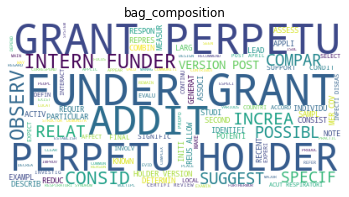

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud(dataframe):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(" ".join([i for i in dataframe.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("bag_composition")

wordcloud(mergedStuff['body_text'])

In [0]:
freq = pd.Series(' '.join(mergedStuff['body_text']).split()).value_counts()[:50]

In [0]:
freq.index

In [0]:
stop_words = ["fig","figure","table", 'use','licens','group','provid',
        "data", "analysis", "analyze", "study",  'model','includ','follow','copyright','display',
        "method", "result", "conclusion", "author",  'day','base','level','medrxiv',
        "find", "found", "show", "perform",  'preprint','differ','popul','high',
        "demonstrate", "evaluate", "discuss", "google", "scholar",'doi',
        "pubmed",  "web", "science", "crossref", "supplementary","this" ,"that",
        'use', 'test', 'al', 'covid', 'data', 'virus', 'time', 'model',
       'infect', 'result', 'differ', 'base', 'number', 'case', 'detect',
       'high', 'effect', 'patient', 'posit', 'perform', 'method', 'fig',
       'group', 'report', 'follow', 'rate', 'set', 'inform', 'sar', 'develop',
       'process', 'level', 'network', 'control', 'import', 'human', 'work',
       'present', 'research', 'like', 'similar', 'risk', 'new', 'viral',
       'region', 'chang', 'function', 'product', 'avail', 'need', 'limit',
       'non', 'approach', 'indic', 'day', 'type', 'learn', 'respect', 'shown',
       'train', 'year', 'given', 'clinic', 'obtain', 'user', 'contain',
       'health', 'term', 'low', 'higher', 'mean', 'factor', 'pathogen',
       'genom', 'state', 'collect', 'direct', 'size', 'predict', 'public',
       'total', 'section', 'protein', 'order', 'form', 'area', 'previous',
       'current', 'point', 'water', 'gene', 'general', 'contact', 'probabl',
       'social', 'author', 'target', 'treatment', 'environ', 'cell']


In [0]:
mergedStuff['body_text'] = mergedStuff['body_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [0]:
text = mergedStuff
mergedStuff = mergedStuff[mergedStuff['body_text'].notna()]

In [0]:
""""
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')
""""


In [0]:
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1, 3), min_df=300, max_df = .7)
description_vectors = vectorizer.fit_transform(mergedStuff['body_text'])
print(description_vectors.shape)

feature_names = vectorizer.get_feature_names()
feature_names[:50]

(10333, 2822)


['abdomin',
 'abil',
 'abl',
 'abnorm',
 'absenc',
 'absent',
 'absolut',
 'absorb',
 'absorpt',
 'abstract',
 'abund',
 'academ',
 'acceler',
 'accept',
 'access',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'accord manufactur',
 'account',
 'accumul',
 'accur',
 'accuraci',
 'ace',
 'ace express',
 'ace receptor',
 'achiev',
 'acid',
 'acid sequenc',
 'acknowledg',
 'acquir',
 'acquisit',
 'act',
 'action',
 'activ',
 'actual',
 'acut',
 'acut respiratori',
 'acut respiratori distress',
 'acut respiratori syndrom',
 'adapt',
 'add',
 'addit',
 'address',
 'adenovirus',
 'adequ',
 'adher',
 'adjac',
 'adjust']

In [0]:
clusterer = KMeans(n_clusters=10, random_state=1)
mergedStuff['Cluster Index'] =clusterer.fit_predict(description_vectors)
cluster_indices = pd.Series(
    clusterer.fit_predict(description_vectors), 
    name='Cluster Index'
)

In [0]:
mergedStuff[['body_text','Cluster Index']]

,body_text,Cluster Index
0,incluaient des hospitali pour pneumoni provoqu...,0
1,februari alarm china news week emerg inpati ps...,8
2,cov pandem children sever affect adult seri ch...,9
3,countri impos restrict rsc various ban outsid ...,3
4,novel coronavirus diseas wuhan china decemb qu...,3
...,...,...
10332,mainland china januari recent throat swab take...,1
10333,bat respons zoonot transmiss major diseas outb...,6
10334,circul china countri territori epidem confirm ...,2
10335,coronavirus diseas newli recogn ill caus sever...,4


In [0]:
from nltk.probability import FreqDist

In [0]:
clus0 = mergedStuff.loc[mergedStuff['Cluster Index'] == 0]
freq_abs0 = pd.Series(' '.join(clus0['body_text']).split()).value_counts()[:100]
freq_abs0.index

Index(['sampl', 'sequenc', 'cov', 'rna', 'valu', 'structur', 'imag', 'specif',
       'diseas', 'increas', 'observ', 'relat', 'compar', 'pcr', 'identifi',
       'addit', 'measur', 'individu', 'strain', 'studi', 'signific', 'generat',
       'assay', 'consid', 'dataset', 'coronavirus', 'negat', 'activ', 'featur',
       'acid', 'requir', 'interact', 'select', 'concentr', 'dna', 'repres',
       'associ', 'potenti', 'bind', 'estim', 'propos', 'determin', 'larg',
       'speci', 'singl', 'host', 'possibl', 'algorithm', 'step', 'condit',
       'caus', 'isol', 'cluster', 'sensit', 'class', 'distribut', 'allow',
       'suggest', 'temperatur', 'exampl', 'design', 'respiratori', 'site',
       'extract', 'holder', 'vaccin', 'complex', 'mutat', 'rang', 'reaction',
       'paramet', 'effici', 'read', 'comput', 'reduc', 'refer', 'express',
       'describ', 'appli', 'epitop', 'calcul', 'initi', 'score', 'consist',
       'improv', 'intern', 'recent', 'locat', 'surfac', 'respons', 'averag',
   

In [0]:
clus1 = mergedStuff.loc[mergedStuff['Cluster Index'] == 1]
freq_abs1 = pd.Series(' '.join(clus1['body_text']).split()).value_counts()[:100]
freq_abs1.index

Index(['funder', 'post', 'version', 'holder', 'grant', 'perpetu', 'april',
       'intern', 'review', 'certifi', 'estim', 'death', 'countri', 'diseas',
       'cov', 'individu', 'hospit', 'allow', 'age', 'valu', 'sever', 'measur',
       'epidem', 'increas', 'sampl', 'studi', 'symptom', 'reus', 'observ',
       'paramet', 'signific', 'relat', 'peopl', 'confirm', 'pandem',
       'transmiss', 'period', 'compar', 'mortal', 'specif', 'spread', 'consid',
       'march', 'outbreak', 'care', 'associ', 'distanc', 'assum', 'addit',
       'distribut', 'outcom', 'infecti', 'variabl', 'polici', 'reduc', 'week',
       'coronavirus', 'identifi', 'lower', 'suggest', 'possibl', 'daili',
       'requir', 'china', 'averag', 'respiratori', 'activ', 'isol', 'respons',
       'icu', 'initi', 'repres', 'larg', 'negat', 'simul', 'condit',
       'strategi', 'rang', 'potenti', 'intervent', 'proport', 'statist',
       'expect', 'scenario', 'communiti', 'peak', 'earli', 'assess', 'date',
       'caus', 'cit

In [0]:
clus2 = mergedStuff.loc[mergedStuff['Cluster Index'] == 2]
freq_abs2 = pd.Series(' '.join(clus2['body_text']).split()).value_counts()[:100]
freq_abs2.index

Index(['care', 'hospit', 'mask', 'protect', 'diseas', 'procedur', 'pandem',
       'medic', 'staff', 'recommend', 'requir', 'room', 'surgeri',
       'respiratori', 'cov', 'ppe', 'surgic', 'manag', 'emerg', 'transmiss',
       'healthcar', 'increas', 'oper', 'ventil', 'person', 'consid', 'cancer',
       'face', 'reduc', 'prevent', 'possibl', 'equip', 'team', 'resourc',
       'outbreak', 'symptom', 'addit', 'measur', 'coronavirus', 'potenti',
       'sever', 'worker', 'aerosol', 'practic', 'unit', 'spread', 'exposur',
       'depart', 'confirm', 'critic', 'therapi', 'servic', 'support', 'intub',
       'isol', 'guidelin', 'hand', 'center', 'pressur', 'continu', 'acut',
       'nurs', 'appropri', 'suspect', 'relat', 'avoid', 'respons', 'respir',
       'individu', 'rapid', 'disinfect', 'specif', 'signific', 'allow',
       'institut', 'minim', 'air', 'week', 'contamin', 'standard', 'facil',
       'plan', 'wear', 'suggest', 'evid', 'system', 'negat', 'countri',
       'visit', 'place',

In [0]:
clus3 = mergedStuff.loc[mergedStuff['Cluster Index'] == 3]
freq_abs3 = pd.Series(' '.join(clus3['body_text']).split()).value_counts()[:100]
freq_abs3.index

Index(['epidem', 'estim', 'individu', 'countri', 'paramet', 'diseas', 'valu',
       'measur', 'spread', 'death', 'period', 'transmiss', 'outbreak', 'peopl',
       'china', 'increas', 'confirm', 'infecti', 'assum', 'consid', 'growth',
       'distribut', 'observ', 'citi', 'peak', 'distanc', 'intervent', 'wuhan',
       'simul', 'quarantin', 'fit', 'initi', 'reduc', 'suscept', 'dynam',
       'march', 'scenario', 'relat', 'isol', 'age', 'lockdown', 'curv',
       'averag', 'equat', 'intern', 'daili', 'hospit', 'possibl', 'polici',
       'person', 'exponenti', 'reproduct', 'travel', 'pandem', 'provinc',
       'earli', 'funder', 'recov', 'grant', 'compar', 'depend', 'strategi',
       'perpetu', 'holder', 'itali', 'repres', 'start', 'signific', 'decreas',
       'larg', 'januari', 'implement', 'expect', 'week', 'symptom', 'interv',
       'cumul', 'condit', 'impact', 'hubei', 'februari', 'variabl',
       'correspond', 'fraction', 'delay', 'april', 'addit', 'date', 'sir',
       'coron

In [0]:
clus5 = mergedStuff.loc[mergedStuff['Cluster Index'] == 5]
freq_abs5 = pd.Series(' '.join(clus5['body_text']).split()).value_counts()[:100]
freq_abs5.index

Index(['que', 'los', 'les', 'des', 'est', 'del', 'por', 'las', 'une',
       'pacient', 'una', 'para', 'dan', 'par', 'pour', 'como', 'caso', 'cov',
       'sur', 'plus', 'sont', 'avec', 'pas', 'qui', 'entr', 'son', 'ser',
       'risqu', 'infecci', 'enfermedad', 'esta', 'ces', 'cas', 'tratamiento',
       'mayor', 'cett', 'traitement', 'chez', 'debe', 'ont', 'han',
       'coronavirus', 'sin', 'aux', 'pued', 'esto', 'durant', 'grave', 'sobr',
       'riesgo', 'mai', 'todo', 'leur', 'pandemia', 'otro', 'ant', 'forma',
       'comm', 'tambi', 'peut', 'sant', 'autr', 'estudio', 'uso', 'medida',
       'respiratoria', 'charg', 'salud', 'posibl', 'person', 'prise', 'associ',
       'ell', 'bien', 'persona', 'sistema', 'pueden', 'quir', 'atenc',
       'respiratorio', 'maladi', 'sanitario', 'pero', 'jour', 'dato', 'tout',
       'situaci', 'dispon', 'tiempo', 'cada', 'recomendacion', 'alta', 'deben',
       'podr', 'san', 'certain', 'soin', 'tanto', 'otra', 'important'],
      dtype='object'

In [0]:
len(set(freq_abs4.index) and set(freq_abs2.index))

In [0]:
+cluster_indices.values

In [0]:

clustered_data = data.join(cluster_indices)
clustered_data.head()


In [0]:
feature_names

In [0]:
len(mergedStuff)